**Cargamos librerias**

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#RandomForest y ginny
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
#Sklearn Logistic regresion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz
#XGBOOST
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
#Normalizamos los datos 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#Matriz de confusión
from sklearn.metrics import confusion_matrix

**ENTREGABLE1**

**Explicación:** 
En este estudio lo primero que hemos observado son las estadisticas basicas para saber cuantos registros tenemos (82) y también ver que máximos y minimos tenemos. 

Posteriormente se ha realizado una detección de duplicados y de valores nulos con tal de asegurarnos que nuestros datos son solidos. 

A continuación hemos visto en detalle cada uno de los campos para poder detectar los outliers tomando la decisión de eliminarlos, no hemos optado por realizar la media con tal de no desvirtuar nuestro cojunto de datos para cada atributo ya que vemos que estan muy alejados. 

Seguidamente hemos valorado mediante la matriz de correlación que variables son más importantes para nuestro conjunto de datos sin darnos un resultado adecuado al pasar este conjunto a diferentes modelos.

Se valoraría discretizar las variables categoricas para poder ver si con ellas podriamos sacar un modelo más adecuado pero por cuestión de tiempo no se ha realizado. La decisión para este caso ha sido pasar todo el conjunto de datos excepto la variable a Target (CLASS)

Finalmente se realizan los modelos de regresión logistica, arbol de decisón y XGBoost en los cuales el mejor resultado ha sido el XGBoost dandonos una predicción de mas del 80%. 

La **conclusión** la sacamos con la matriz de confusión, donde concluimos que el modelo de XGBoost nos estaría prediciendo que tendría la cantidad de falso positivos sería de 2 mientras la cantidad de falsos negativos sería 0.

**Cargamos fichero ranking**

In [86]:
filerankingApr23 = '/content/drive/MyDrive/qesdatascience/rankingSummary_Apr23.csv'
df_rankingApr23 = pd.DataFrame()
data_rankingApr23 = pd.read_csv(filerankingApr23)
df_rankingApr23 = pd.concat([df_rankingApr23, data_rankingApr23], axis=0)
display(df_rankingApr23)

,CamID,qMeasure,qMeasure-wei,AvgqMeasure,WorstVal,PassWeight,CentralVal,PeriVal,StdqMeasure,nLowQRegs,MaxSizeReg,SumDefectPixs,prePASS,CatHW,RANK,CLASS
0,169.01,0.975033,0.420657,0.777457,0.533750,0.788116,1.355482,8.535250,0.067782,71,2015,3981,OK,--,28,OK
1,169.02,0.981153,0.382678,0.800277,0.444396,0.861120,1.233903,4.969408,0.053894,65,346,1583,OK,--,46,NO
2,169.03,0.977093,0.341533,0.772666,0.438100,0.779578,1.364045,6.531381,0.071657,56,1800,3029,OK,--,57,NO
3,169.04,0.977330,0.367638,0.804501,0.426138,0.862721,1.143142,6.284568,0.049342,69,1613,2662,OK,--,48,OK
4,169.05,0.978594,0.342388,0.787204,0.434041,0.788839,1.881693,7.711223,0.064329,78,462,2152,OK,--,56,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,169.60,0.979684,0.457418,0.802711,0.522179,0.875979,0.984448,5.447313,0.054079,57,1411,2737,OK,--,20,OK
78,169.61,0.974733,0.440689,0.798175,0.520454,0.846740,2.216994,4.513579,0.052903,62,1846,3169,OK,--,25,OK
79,169.62,0.979314,0.491944,0.805648,0.547217,0.898994,0.606664,5.048849,0.052172,71,147,1383,OK,--,4,OK
80,169.63,0.974430,0.461556,0.794893,0.534064,0.864234,1.564460,5.421878,0.054917,83,1646,3146,OK,--,16,OK


**Miramos las estadisticas basicas de los datos**



In [87]:
df_rankingApr23.describe()

,CamID,qMeasure,qMeasure-wei,AvgqMeasure,WorstVal,PassWeight,CentralVal,PeriVal,StdqMeasure,nLowQRegs,MaxSizeReg,SumDefectPixs,RANK
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,169.301098,0.976416,0.378405,0.791976,0.466383,0.804091,1.834042,8.936686,0.058986,76.060976,1187.597561,2908.353659,41.500000
std,0.176201,0.003625,0.089270,0.013303,0.064803,0.118097,0.853654,11.431942,0.008936,17.215660,971.345037,1207.880353,23.815261
min,169.010000,0.959797,0.057298,0.762426,0.314571,0.129435,0.606664,3.096093,0.042345,47.000000,87.000000,1324.000000,1.000000
25%,169.162500,0.974879,0.326891,0.780739,0.421823,0.783755,1.188434,5.212646,0.053334,62.250000,333.750000,2064.000000,21.250000
50%,169.290000,0.976750,0.386876,0.794315,0.477976,0.837442,1.615309,7.007546,0.056941,72.000000,1202.000000,2808.000000,41.500000
75%,169.437500,0.978586,0.450966,0.802846,0.522423,0.866205,2.208563,8.782805,0.066448,86.750000,1858.750000,3358.000000,61.750000
max,169.640000,0.982406,0.525011,0.818987,0.577830,0.911107,4.399435,99.462215,0.078332,119.000000,6497.000000,9058.000000,82.000000


**Eliminamos duplicados**

In [88]:
# Detectar duplicados basados en todas las columnas
duplicados = df_rankingApr23.duplicated()

# Mostrar las filas duplicadas
filas_duplicadas = df_rankingApr23[duplicados]
print("Filas duplicadas:")
print(filas_duplicadas)#No hay duplicados

Filas duplicadas:
Empty DataFrame
Columns: [CamID, qMeasure, qMeasure-wei, AvgqMeasure, WorstVal, PassWeight, CentralVal, PeriVal, StdqMeasure, nLowQRegs, MaxSizeReg, SumDefectPixs, prePASS, CatHW, RANK, CLASS]
Index: []


**Detección de nulos**

In [89]:
valores_nulos = df_rankingApr23.apply(lambda col: col.isna().sum())
display(valores_nulos)

CamID            0
qMeasure         0
qMeasure-wei     0
AvgqMeasure      0
WorstVal         0
PassWeight       0
CentralVal       0
PeriVal          0
StdqMeasure      0
nLowQRegs        0
MaxSizeReg       0
SumDefectPixs    0
prePASS          0
CatHW            0
RANK             0
CLASS            0
dtype: int64

**Outliers**

**Valores mayores por cada campo:**

In [90]:
for col in df_rankingApr23:
  if df_rankingApr23[col].dtype == float or df_rankingApr23[col].dtype == int:
    outliers_float = df_rankingApr23[col].sort_values(ascending=False).head(10)
    print(outliers_float)


81    169.64
80    169.63
79    169.62
78    169.61
77    169.60
76    169.59
75    169.58
74    169.57
73    169.56
72    169.55
Name: CamID, dtype: float64
32    0.982406
24    0.981822
65    0.981494
23    0.981303
1     0.981153
14    0.980793
76    0.980582
41    0.980307
39    0.980263
8     0.980147
Name: qMeasure, dtype: float64
8     0.525011
76    0.505878
61    0.499235
79    0.491944
54    0.488154
69    0.485031
63    0.482718
33    0.480772
70    0.475035
17    0.474917
Name: qMeasure-wei, dtype: float64
8     0.818987
61    0.817662
60    0.813593
31    0.812965
54    0.810529
36    0.808759
45    0.808385
44    0.808189
52    0.807774
62    0.806813
Name: AvgqMeasure, dtype: float64
8     0.577830
54    0.577454
76    0.555235
61    0.551549
17    0.549871
79    0.547217
69    0.546310
38    0.540472
64    0.539694
50    0.537900
Name: WorstVal, dtype: float64
76    0.911107
8     0.908592
61    0.905151
63    0.903431
79    0.898994
33    0.895257
65    0.889841
41    

Valores menores por cada campo:

In [91]:
for col in df_rankingApr23:
  if df_rankingApr23[col].dtype == float or df_rankingApr23[col].dtype == int:
    outliers_float = df_rankingApr23[col].sort_values(ascending=True).head(10)
    print(outliers_float)

0    169.01
1    169.02
2    169.03
3    169.04
4    169.05
5    169.06
6    169.06
7    169.07
8    169.07
9    169.08
Name: CamID, dtype: float64
27    0.959797
5     0.961492
16    0.970568
54    0.971001
58    0.971511
55    0.971659
51    0.972354
57    0.972417
6     0.973131
37    0.973259
Name: qMeasure, dtype: float64
27    0.057298
5     0.111524
21    0.191379
15    0.225686
19    0.241773
34    0.244482
22    0.256589
16    0.258546
12    0.271185
57    0.276004
Name: qMeasure-wei, dtype: float64
46    0.762426
42    0.763252
15    0.769174
21    0.769712
32    0.772318
2     0.772666
9     0.772988
25    0.773764
58    0.773785
43    0.774675
Name: AvgqMeasure, dtype: float64
19    0.314571
15    0.322027
21    0.338717
60    0.344026
34    0.351537
45    0.357454
28    0.372135
22    0.376691
31    0.381873
12    0.381914
Name: WorstVal, dtype: float64
27    0.129435
5     0.264247
21    0.565011
16    0.626414
22    0.681165
34    0.695467
15    0.700829
12    0.710068
5

Ploteamos los valores de los atributos:

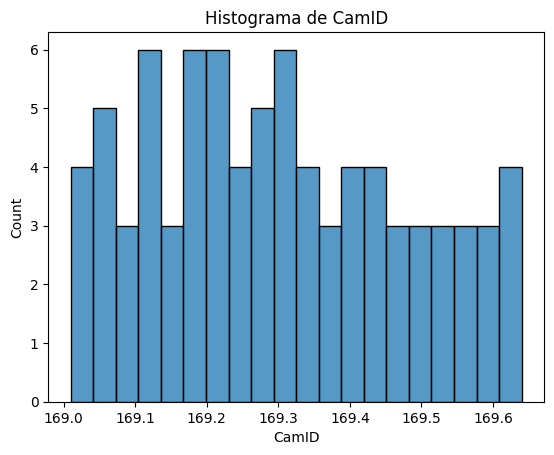

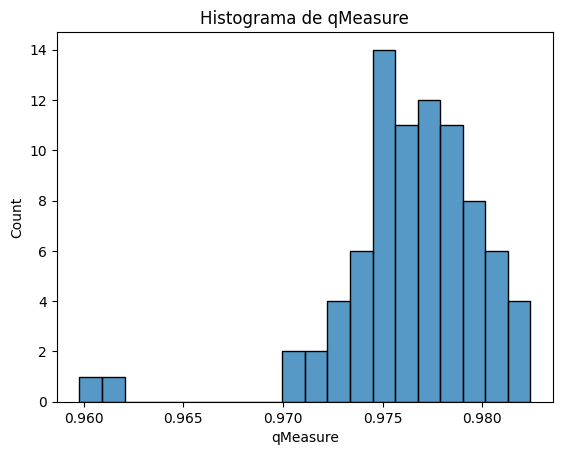

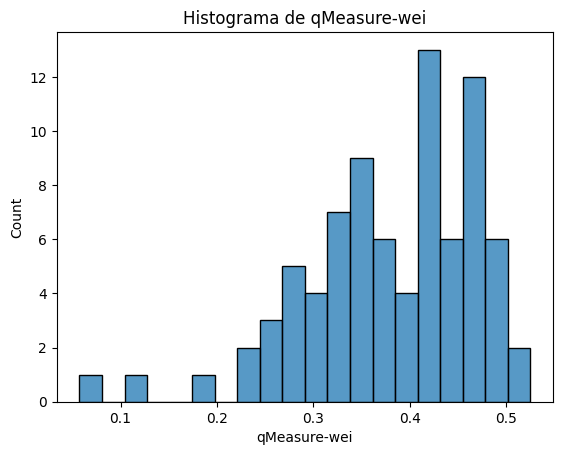

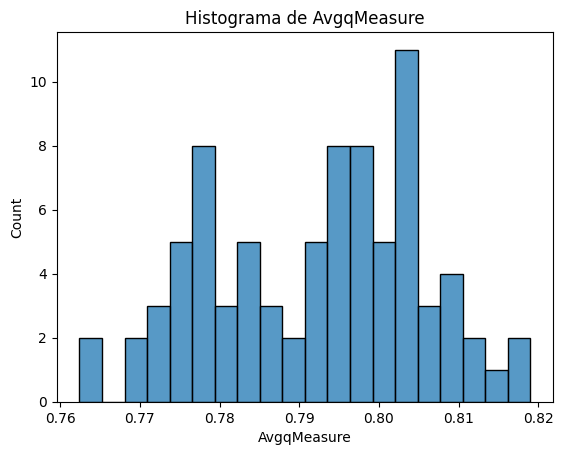

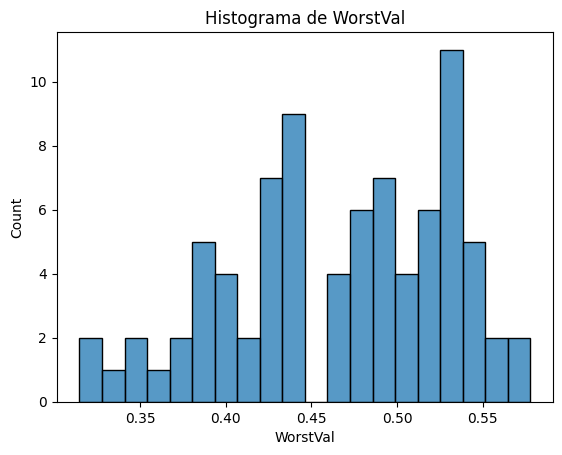

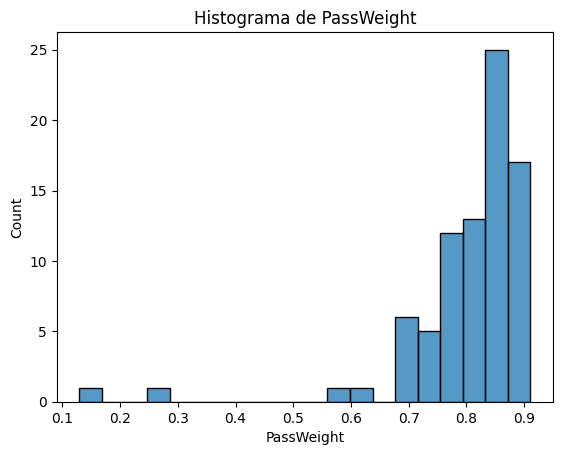

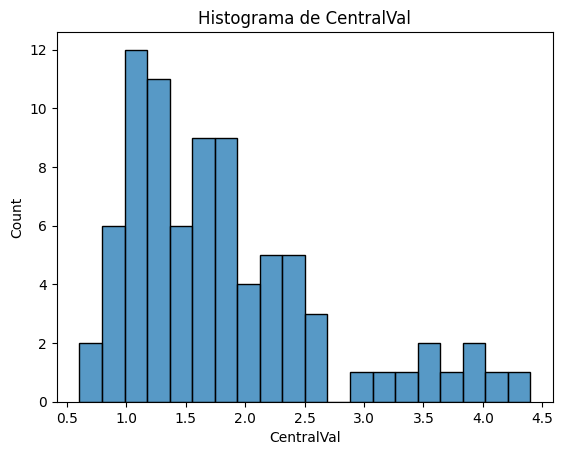

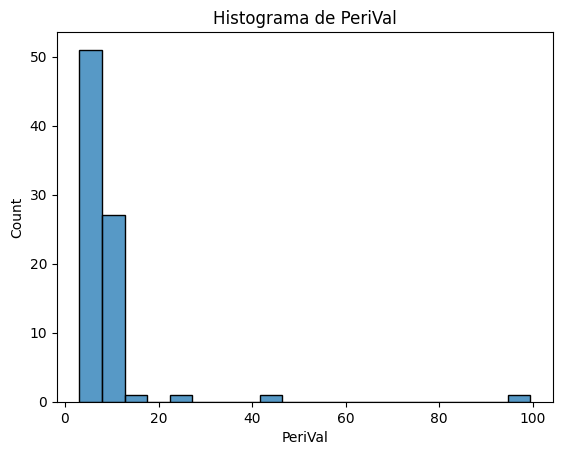

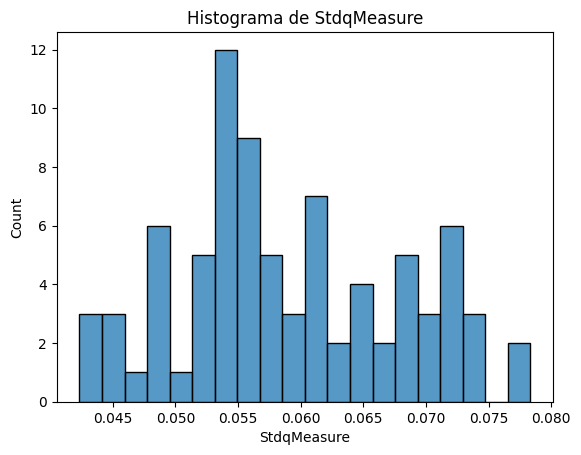

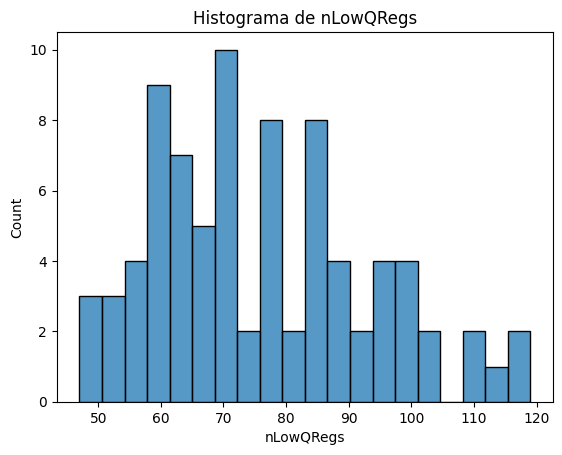

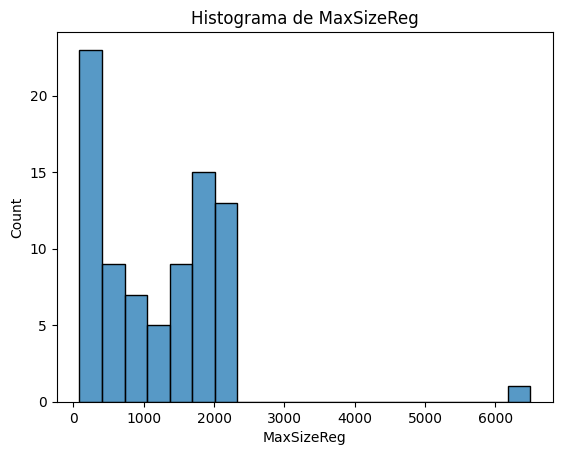

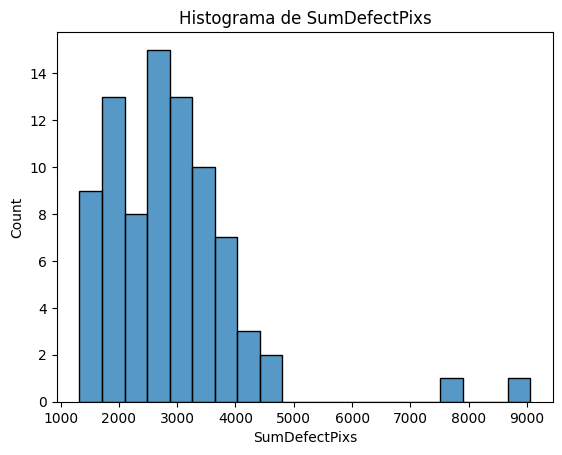

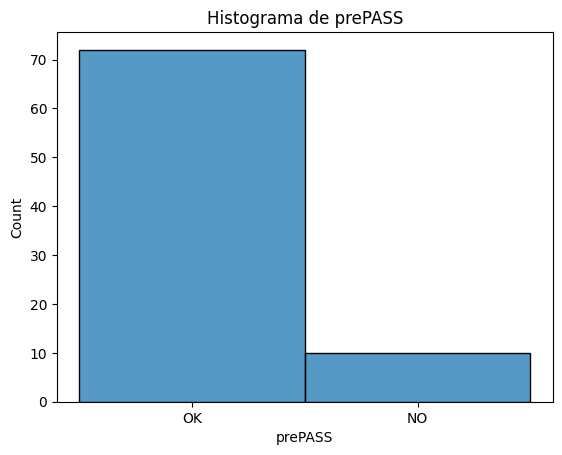

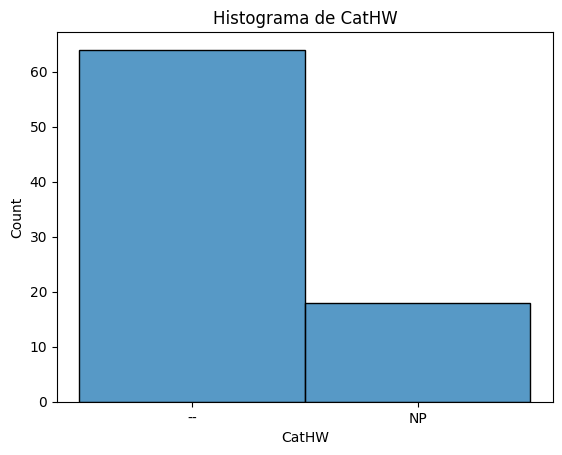

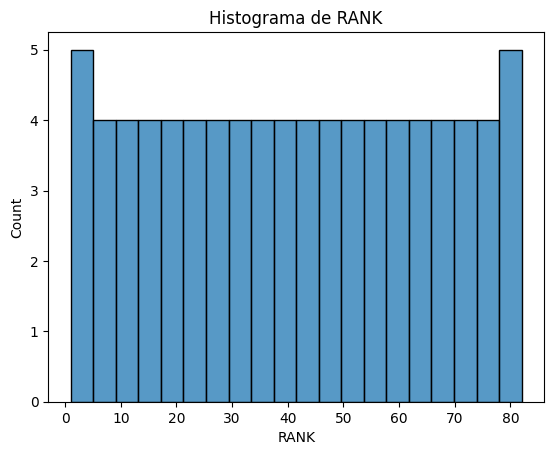

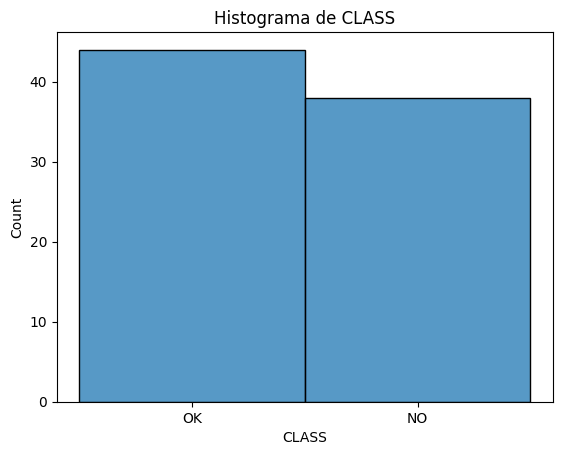

In [92]:
# Plotear histograma para cada columna del DataFrame
for col in df_rankingApr23.columns:
    sns.histplot(data=df_rankingApr23[col], bins=20)
    plt.title(f'Histograma de {col}')
    plt.show()

Passweight definimos todo lo que es < 0.5 es outlier. MaxSizeReg definimos los que son > 2500. SumDefectPixs todo lo mayor a 5000 se consideraria un outlier. PeriVal todo lo que sea > 80 podriamos considerarlos outlier. PassWeight todo lo que sea menor a 0.5 podriamos considerarlo outlier.El qMeasure-wei todo lo que sea menor a 0.2 podriamos considerarlo outlier.

**Tratamiento y filtrado de outliers**

Ploteamos en modo histograma los Kmeans de MaxSizeReg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-93-93884e110531>:11: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.histplot(data=df_rankingApr23_filtered, x='MaxSizeReg', hue=labels, kde=True, bins=20, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


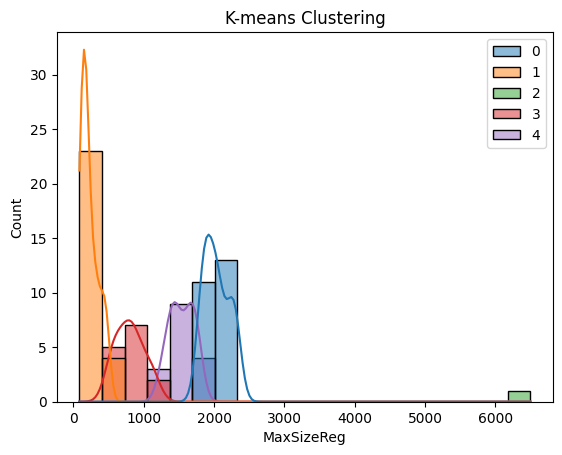

In [93]:
#Creamos un dataframe para conservar los valores originales
df_rankingApr23_filtered = df_rankingApr23
# Crear el objeto KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_rankingApr23_filtered[['MaxSizeReg']])

# Obtener las etiquetas de los clusters asignados a cada punto
labels = kmeans.labels_

# Plotear el histograma de la variable 'MaxSizeReg' según los clusters
sns.histplot(data=df_rankingApr23_filtered, x='MaxSizeReg', hue=labels, kde=True, bins=20, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Configurar el título y los ejes del gráfico
plt.title('K-means Clustering')
plt.xlabel('MaxSizeReg')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

**Eliminamos los outliers del cluster 2 para MaxSizeReg**

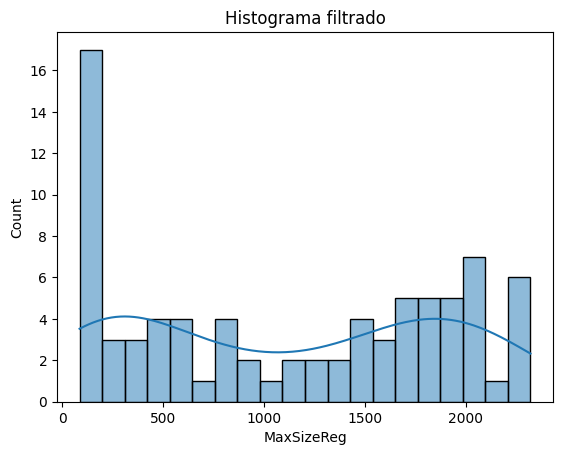

In [94]:
# Obtener los índices de los puntos correspondientes al cluster
indices_to_remove = np.where(labels == 2)[0]

# Filtrar los datos eliminando los puntos correspondientes al cluster
df_rankingApr23_filtered = df_rankingApr23_filtered.loc[~df_rankingApr23_filtered.index.isin(indices_to_remove)]

# Plotear el histograma filtrado
sns.histplot(data=df_rankingApr23_filtered['MaxSizeReg'], kde=True, bins=20)

# Configurar el título y los ejes del gráfico
plt.title('Histograma filtrado')
plt.xlabel('MaxSizeReg')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()


In [95]:
df_rankingApr23_filtered.describe()

,CamID,qMeasure,qMeasure-wei,AvgqMeasure,WorstVal,PassWeight,CentralVal,PeriVal,StdqMeasure,nLowQRegs,MaxSizeReg,SumDefectPixs,RANK
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,169.302346,0.976621,0.382370,0.792077,0.466676,0.812420,1.808760,8.740676,0.059071,76.000000,1122.049383,2832.432099,41.000000
std,0.176934,0.003132,0.082243,0.013355,0.065152,0.091441,0.827506,11.363675,0.008958,17.314012,773.681377,999.324333,23.526581
min,169.010000,0.961492,0.111524,0.762426,0.314571,0.264247,0.606664,3.096093,0.042345,47.000000,87.000000,1324.000000,1.000000
25%,169.160000,0.974946,0.327023,0.780606,0.421797,0.787347,1.179318,5.163504,0.053502,62.000000,333.000000,2055.000000,21.000000
50%,169.290000,0.976817,0.386953,0.794607,0.478052,0.840514,1.612455,6.987287,0.057103,71.000000,1147.000000,2798.000000,41.000000
75%,169.440000,0.978594,0.451766,0.802891,0.522504,0.866365,2.183270,8.782629,0.066743,87.000000,1846.000000,3316.000000,61.000000
max,169.640000,0.982406,0.525011,0.818987,0.577830,0.911107,4.399435,99.462215,0.078332,119.000000,2321.000000,7887.000000,81.000000


Ploteamos en modo histograma los Kmeans de SumDefectPixs

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-96-7d8466f0b2a1>:9: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.histplot(data=df_rankingApr23_filtered, x='SumDefectPixs', hue=labels, kde=True, bins=20,palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


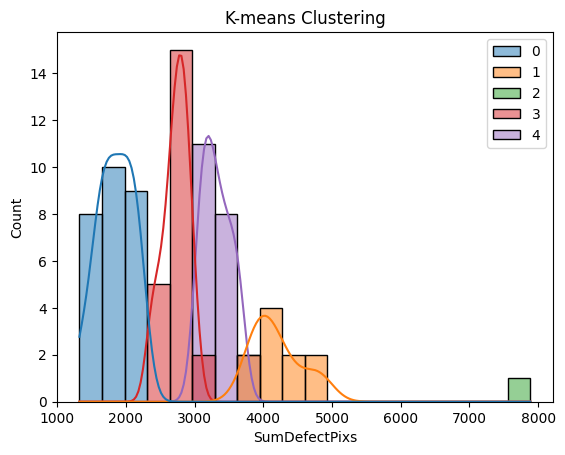

In [96]:
# Crear el objeto KMeans
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(df_rankingApr23_filtered[['SumDefectPixs']])

# Obtener las etiquetas de los clusters asignados a cada punto
labels = kmeans.labels_

# Plotear el histograma de la variable 'SumDefectixs' según los clusters
sns.histplot(data=df_rankingApr23_filtered, x='SumDefectPixs', hue=labels, kde=True, bins=20,palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Configurar el título y los ejes del gráfico
plt.title('K-means Clustering')
plt.xlabel('SumDefectPixs')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

**Eliminamos Outliers para SumDefectPixs**

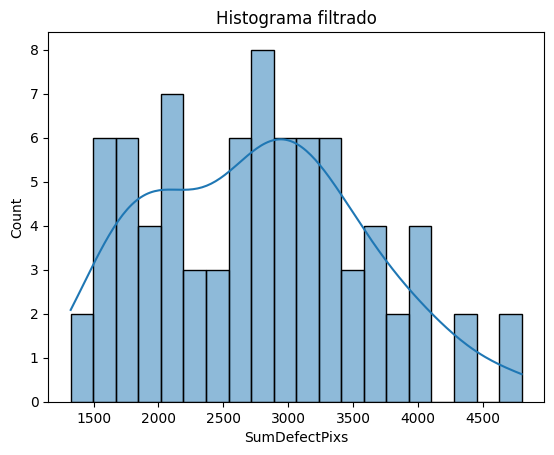

In [97]:
# Filtrar los datos según las etiquetas del cluster deseado
cluster_indices = np.where(labels == 2)[0]
df_rankingApr23_filtered = df_rankingApr23_filtered.loc[~df_rankingApr23_filtered.index.isin(cluster_indices)]

# Plotear el histograma filtrado
sns.histplot(data=df_rankingApr23_filtered['SumDefectPixs'], kde=True, bins=20)

# Configurar el título y los ejes del gráfico
plt.title('Histograma filtrado')
plt.xlabel('SumDefectPixs')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()


**Vemos el dataset con los datos sin outliers**

In [98]:
df_rankingApr23_filtered.describe()

,CamID,qMeasure,qMeasure-wei,AvgqMeasure,WorstVal,PassWeight,CentralVal,PeriVal,StdqMeasure,nLowQRegs,MaxSizeReg,SumDefectPixs,RANK
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.0000
mean,169.305375,0.976810,0.385755,0.792159,0.467234,0.819272,1.801982,8.270484,0.059141,75.575000,1107.062500,2769.250000,40.5000
std,0.175924,0.002646,0.076873,0.013418,0.065368,0.067941,0.830461,10.612893,0.008992,16.992757,766.639706,826.950437,23.2379
min,169.010000,0.970568,0.191379,0.762426,0.314571,0.565011,0.606664,3.096093,0.042345,47.000000,87.000000,1324.000000,1.0000
25%,169.167500,0.975011,0.329316,0.780247,0.421451,0.787643,1.174560,5.161345,0.053668,62.000000,322.750000,2054.750000,20.7500
50%,169.295000,0.976823,0.396481,0.794750,0.479773,0.841679,1.598889,6.967195,0.057227,71.000000,1122.000000,2795.500000,40.5000
75%,169.442500,0.978657,0.453179,0.802963,0.523304,0.866787,2.139396,8.698293,0.066888,86.250000,1838.500000,3289.750000,60.2500
max,169.640000,0.982406,0.525011,0.818987,0.577830,0.911107,4.399435,99.462215,0.078332,119.000000,2302.000000,4800.000000,80.0000


**Ploteamos en modo histograma los Kmeans de PeriVal**

En el campo PeriVal hemos hecho un Kmeans de 5 clusters y no de 3 con tal de realizar un filtro sin eliminar parte de los datos que aparecian más concentrados en el conjunto de datos. 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-99-7b67a5921f7f>:9: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.histplot(data=df_rankingApr23_filtered, x='PeriVal', hue=labels, kde=True, bins=20, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


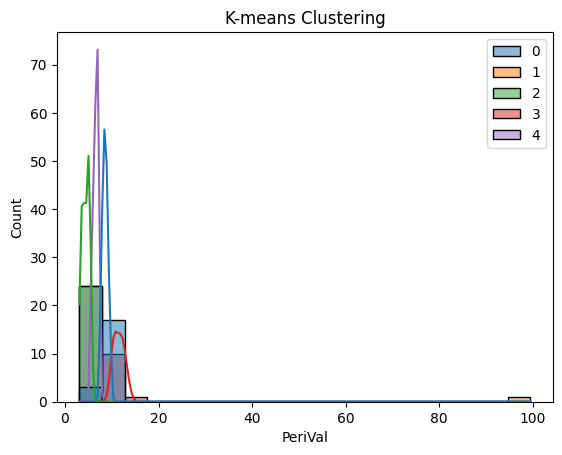

In [99]:
# Crear el objeto KMeans
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(df_rankingApr23_filtered[['PeriVal']])

# Obtener las etiquetas de los clusters asignados a cada punto
labels = kmeans.labels_

# Plotear el histograma de la variable 'SumDefectixs' según los clusters
sns.histplot(data=df_rankingApr23_filtered, x='PeriVal', hue=labels, kde=True, bins=20, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Configurar el título y los ejes del gráfico
plt.title('K-means Clustering')
plt.xlabel('PeriVal')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

**Eliminamos datos del cluster 1 PeriVal**

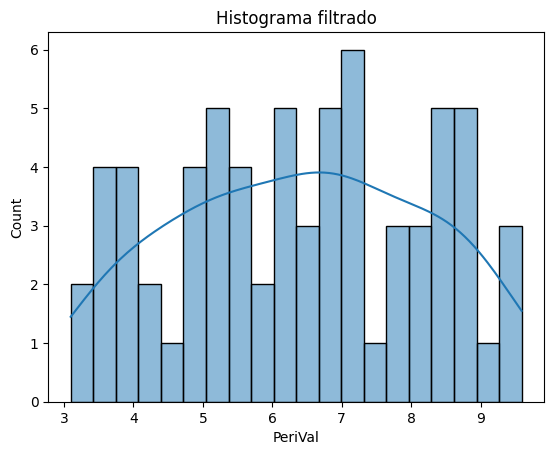

In [100]:
# Obtener los índices de los puntos correspondientes al cluster deseado
cluster_indices = np.where((labels == 1) | (labels == 3))[0]

# Restablecer los índices del DataFrame original
df_rankingApr23_filtered.reset_index(drop=True, inplace=True)

# Filtrar los datos eliminando los puntos correspondientes al cluster
df_rankingApr23_filtered = df_rankingApr23_filtered.loc[~df_rankingApr23_filtered.index.isin(cluster_indices)]

# Plotear el histograma filtrado
sns.histplot(data=df_rankingApr23_filtered['PeriVal'], kde=True, bins=20)

# Configurar el título y los ejes del gráfico
plt.title('Histograma filtrado')
plt.xlabel('PeriVal')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()


**Resumen de los datos**

In [101]:
df_rankingApr23_filtered.describe()

,CamID,qMeasure,qMeasure-wei,AvgqMeasure,WorstVal,PassWeight,CentralVal,PeriVal,StdqMeasure,nLowQRegs,MaxSizeReg,SumDefectPixs,RANK
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,169.314706,0.977016,0.391167,0.793450,0.469793,0.827515,1.811665,6.401979,0.058392,75.323529,1050.647059,2669.720588,39.264706
std,0.175554,0.002579,0.073269,0.013328,0.064463,0.057907,0.814869,1.793747,0.009003,16.231939,758.520885,793.147948,22.982549
min,169.010000,0.971001,0.241773,0.762426,0.314571,0.681165,0.606664,3.096093,0.042345,47.000000,87.000000,1324.000000,1.000000
25%,169.170000,0.975056,0.331957,0.781782,0.421451,0.788023,1.206664,5.028989,0.052720,61.000000,258.000000,2017.000000,19.750000
50%,169.300000,0.977187,0.409481,0.796959,0.482818,0.846047,1.598889,6.480111,0.056227,73.000000,937.000000,2697.500000,38.000000
75%,169.452500,0.978991,0.458300,0.803925,0.526167,0.871431,2.191701,7.850220,0.065857,86.250000,1805.000000,3151.750000,59.250000
max,169.630000,0.981822,0.525011,0.818987,0.577830,0.911107,4.399435,9.590967,0.078332,115.000000,2289.000000,4800.000000,78.000000


**Ploteamos en modo histograma los Kmeans de PassWeight**

En este caso elegimos un kmeans de 5 de la misma forma ya que intentamos separar por cluster los outliers para poder eliminarlos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-102-0addc9fbfdad>:9: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.histplot(data=df_rankingApr23_filtered, x='PassWeight', hue=labels, kde=True, bins=20, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


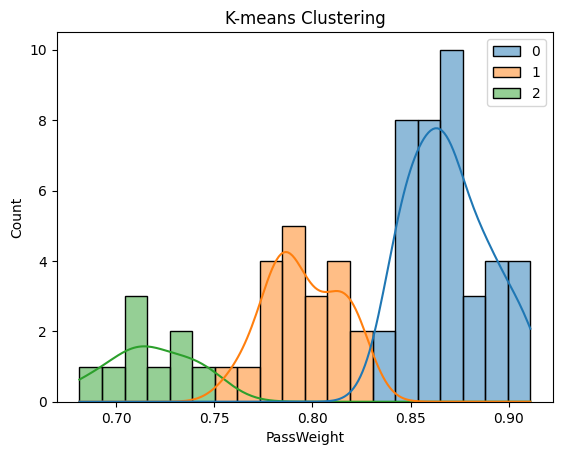

In [102]:
# Crear el objeto KMeans
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(df_rankingApr23_filtered[['PassWeight']])

# Obtener las etiquetas de los clusters asignados a cada punto
labels = kmeans.labels_

# Plotear el histograma de la variable 'SumDefectixs' según los clusters
sns.histplot(data=df_rankingApr23_filtered, x='PassWeight', hue=labels, kde=True, bins=20, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Configurar el título y los ejes del gráfico
plt.title('K-means Clustering')
plt.xlabel('PassWeight')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

In [103]:
# Obtener los índices de los puntos correspondientes al cluster deseado
"""cluster_indices = np.where(labels == 3)[0]

# Restablecer los índices del DataFrame original
df_rankingApr23_filtered.reset_index(drop=True, inplace=True)

# Filtrar los datos eliminando los puntos correspondientes al cluster
df_rankingApr23_filtered = df_rankingApr23_filtered.loc[~df_rankingApr23_filtered.index.isin(cluster_indices)]

# Plotear el histograma filtrado
sns.histplot(data=df_rankingApr23_filtered['PassWeight'], kde=True, bins=20)

# Configurar el título y los ejes del gráfico
plt.title('Histograma filtrado')
plt.xlabel('PassWeight')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()"""

"cluster_indices = np.where(labels == 3)[0]\n\n# Restablecer los índices del DataFrame original\ndf_rankingApr23_filtered.reset_index(drop=True, inplace=True)\n\n# Filtrar los datos eliminando los puntos correspondientes al cluster\ndf_rankingApr23_filtered = df_rankingApr23_filtered.loc[~df_rankingApr23_filtered.index.isin(cluster_indices)]\n\n# Plotear el histograma filtrado\nsns.histplot(data=df_rankingApr23_filtered['PassWeight'], kde=True, bins=20)\n\n# Configurar el título y los ejes del gráfico\nplt.title('Histograma filtrado')\nplt.xlabel('PassWeight')\nplt.ylabel('Count')\n\n# Mostrar el gráfico\nplt.show()"

**Resumen de los datos:**

In [104]:
df_rankingApr23_filtered.describe()

,CamID,qMeasure,qMeasure-wei,AvgqMeasure,WorstVal,PassWeight,CentralVal,PeriVal,StdqMeasure,nLowQRegs,MaxSizeReg,SumDefectPixs,RANK
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,169.314706,0.977016,0.391167,0.793450,0.469793,0.827515,1.811665,6.401979,0.058392,75.323529,1050.647059,2669.720588,39.264706
std,0.175554,0.002579,0.073269,0.013328,0.064463,0.057907,0.814869,1.793747,0.009003,16.231939,758.520885,793.147948,22.982549
min,169.010000,0.971001,0.241773,0.762426,0.314571,0.681165,0.606664,3.096093,0.042345,47.000000,87.000000,1324.000000,1.000000
25%,169.170000,0.975056,0.331957,0.781782,0.421451,0.788023,1.206664,5.028989,0.052720,61.000000,258.000000,2017.000000,19.750000
50%,169.300000,0.977187,0.409481,0.796959,0.482818,0.846047,1.598889,6.480111,0.056227,73.000000,937.000000,2697.500000,38.000000
75%,169.452500,0.978991,0.458300,0.803925,0.526167,0.871431,2.191701,7.850220,0.065857,86.250000,1805.000000,3151.750000,59.250000
max,169.630000,0.981822,0.525011,0.818987,0.577830,0.911107,4.399435,9.590967,0.078332,115.000000,2289.000000,4800.000000,78.000000


**Ploteamos en modo histograma los Kmeans de qMeasure**

Ponemos 9 para asegurarnos de no eliminar datos que nos podrian servir para el analisis.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-105-1db7fdaa2937>:9: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.histplot(data=df_rankingApr23_filtered, x='qMeasure', hue=labels, kde=True, bins=20,palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


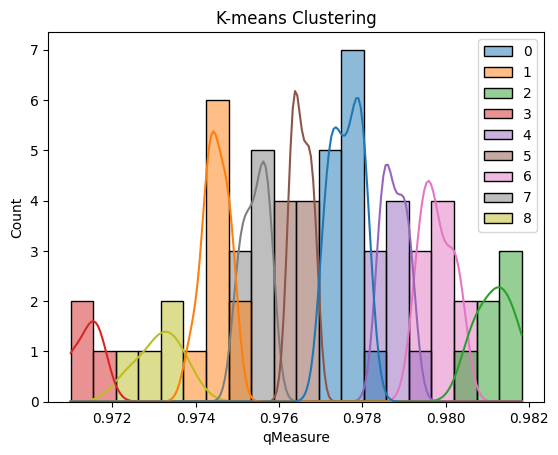

In [105]:
# Crear el objeto KMeans
kmeans = KMeans(n_clusters=9,random_state=42)
kmeans.fit(df_rankingApr23_filtered[['qMeasure']])

# Obtener las etiquetas de los clusters asignados a cada punto
labels = kmeans.labels_

# Plotear el histograma de la variable 'SumDefectixs' según los clusters
sns.histplot(data=df_rankingApr23_filtered, x='qMeasure', hue=labels, kde=True, bins=20,palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Configurar el título y los ejes del gráfico
plt.title('K-means Clustering')
plt.xlabel('qMeasure')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

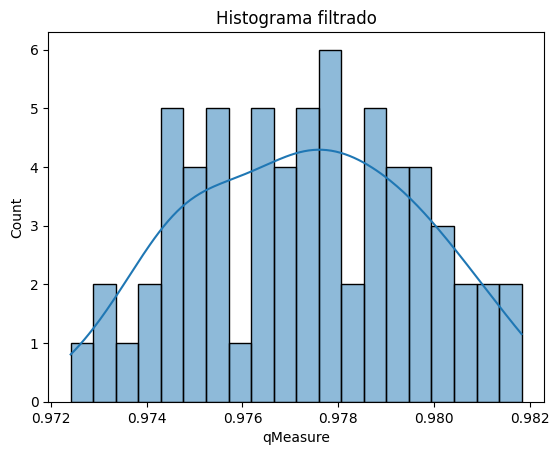

In [106]:
# Obtener los índices de los puntos correspondientes al cluster deseado
cluster_indices = np.where(labels == 3)[0]

# Restablecer los índices del DataFrame original
df_rankingApr23_filtered.reset_index(drop=True, inplace=True)

# Filtrar los datos eliminando los puntos correspondientes al cluster
df_rankingApr23_filtered = df_rankingApr23_filtered.loc[~df_rankingApr23_filtered.index.isin(cluster_indices)]

# Plotear el histograma filtrado
sns.histplot(data=df_rankingApr23_filtered['qMeasure'], kde=True, bins=20)

# Configurar el título y los ejes del gráfico
plt.title('Histograma filtrado')
plt.xlabel('qMeasure')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

In [107]:
df_rankingApr23_filtered.describe()

,CamID,qMeasure,qMeasure-wei,AvgqMeasure,WorstVal,PassWeight,CentralVal,PeriVal,StdqMeasure,nLowQRegs,MaxSizeReg,SumDefectPixs,RANK
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,169.311077,0.977275,0.390232,0.793468,0.467441,0.829391,1.789070,6.317990,0.058477,74.230769,1004.000000,2589.923077,39.553846
std,0.178755,0.002325,0.073884,0.013241,0.064401,0.057766,0.825340,1.781237,0.008930,15.751755,742.043252,712.597500,23.076659
min,169.010000,0.972417,0.241773,0.762426,0.314571,0.681165,0.606664,3.096093,0.042345,47.000000,87.000000,1324.000000,1.000000
25%,169.170000,0.975356,0.330080,0.781996,0.420413,0.788247,1.179318,4.969408,0.052903,61.000000,246.000000,1969.000000,20.000000
50%,169.300000,0.977330,0.410595,0.796968,0.481494,0.847385,1.564460,6.300287,0.056236,71.000000,808.000000,2677.000000,37.000000
75%,169.460000,0.979067,0.457418,0.803906,0.525703,0.871688,2.081930,7.711223,0.065562,85.000000,1754.000000,3115.000000,60.000000
max,169.630000,0.981822,0.525011,0.818987,0.577830,0.911107,4.399435,9.590967,0.078332,115.000000,2284.000000,3993.000000,78.000000


**Ploteamos en modo histograma los Kmeans de qMeasure-wei**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-108-20486aafa4b2>:9: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.histplot(data=df_rankingApr23_filtered, x='qMeasure-wei', hue=labels, kde=True, bins=20, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


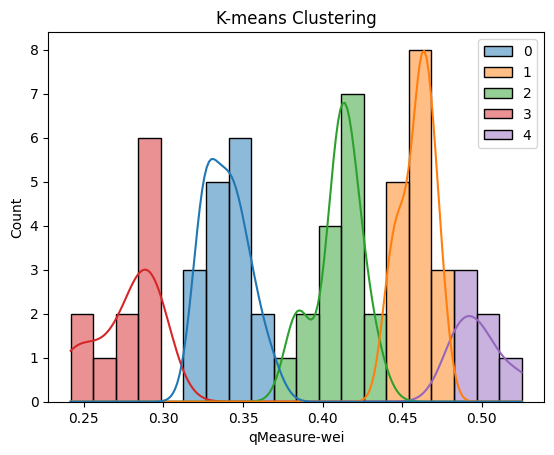

In [108]:
# Crear el objeto KMeans
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(df_rankingApr23_filtered[['qMeasure-wei']])

# Obtener las etiquetas de los clusters asignados a cada punto
labels = kmeans.labels_

# Plotear el histograma de la variable 'SumDefectixs' según los clusters
sns.histplot(data=df_rankingApr23_filtered, x='qMeasure-wei', hue=labels, kde=True, bins=20, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Configurar el título y los ejes del gráfico
plt.title('K-means Clustering')
plt.xlabel('qMeasure-wei')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

In [109]:
"""# Obtener los índices de los puntos correspondientes al cluster deseado
cluster_indices = np.where(labels == 2)[0]

# Restablecer los índices del DataFrame original
df_rankingApr23_filtered.reset_index(drop=True, inplace=True)

# Filtrar los datos eliminando los puntos correspondientes al cluster
df_rankingApr23_filtered = df_rankingApr23_filtered.loc[~df_rankingApr23_filtered.index.isin(cluster_indices)]

# Plotear el histograma filtrado
sns.histplot(data=df_rankingApr23_filtered['qMeasure-wei'], kde=True, bins=20)

# Configurar el título y los ejes del gráfico
plt.title('Histograma filtrado')
plt.xlabel('qMeasure-wei')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()"""

"# Obtener los índices de los puntos correspondientes al cluster deseado\ncluster_indices = np.where(labels == 2)[0]\n\n# Restablecer los índices del DataFrame original\ndf_rankingApr23_filtered.reset_index(drop=True, inplace=True)\n\n# Filtrar los datos eliminando los puntos correspondientes al cluster\ndf_rankingApr23_filtered = df_rankingApr23_filtered.loc[~df_rankingApr23_filtered.index.isin(cluster_indices)]\n\n# Plotear el histograma filtrado\nsns.histplot(data=df_rankingApr23_filtered['qMeasure-wei'], kde=True, bins=20)\n\n# Configurar el título y los ejes del gráfico\nplt.title('Histograma filtrado')\nplt.xlabel('qMeasure-wei')\nplt.ylabel('Count')\n\n# Mostrar el gráfico\nplt.show()"

In [110]:
df_rankingApr23_filtered.describe()

,CamID,qMeasure,qMeasure-wei,AvgqMeasure,WorstVal,PassWeight,CentralVal,PeriVal,StdqMeasure,nLowQRegs,MaxSizeReg,SumDefectPixs,RANK
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,169.311077,0.977275,0.390232,0.793468,0.467441,0.829391,1.789070,6.317990,0.058477,74.230769,1004.000000,2589.923077,39.553846
std,0.178755,0.002325,0.073884,0.013241,0.064401,0.057766,0.825340,1.781237,0.008930,15.751755,742.043252,712.597500,23.076659
min,169.010000,0.972417,0.241773,0.762426,0.314571,0.681165,0.606664,3.096093,0.042345,47.000000,87.000000,1324.000000,1.000000
25%,169.170000,0.975356,0.330080,0.781996,0.420413,0.788247,1.179318,4.969408,0.052903,61.000000,246.000000,1969.000000,20.000000
50%,169.300000,0.977330,0.410595,0.796968,0.481494,0.847385,1.564460,6.300287,0.056236,71.000000,808.000000,2677.000000,37.000000
75%,169.460000,0.979067,0.457418,0.803906,0.525703,0.871688,2.081930,7.711223,0.065562,85.000000,1754.000000,3115.000000,60.000000
max,169.630000,0.981822,0.525011,0.818987,0.577830,0.911107,4.399435,9.590967,0.078332,115.000000,2284.000000,3993.000000,78.000000


**Matriz de correlación**

<ipython-input-111-e895950840b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_rankingApr23_filtered.corr()


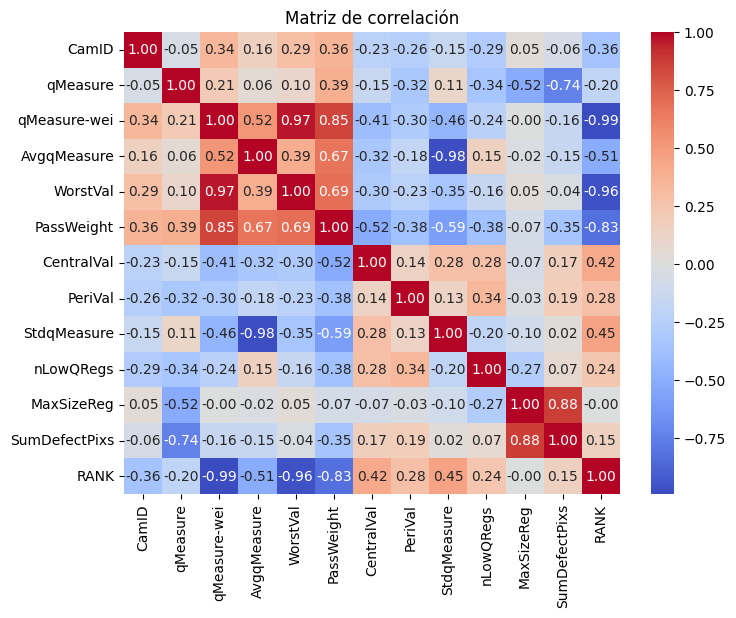

In [111]:

# Calcular la matriz de correlación
matriz_correlacion = df_rankingApr23_filtered.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Plotear la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, fmt='.2f', cmap='coolwarm')

# Mostrar el gráfico
plt.title('Matriz de correlación')
plt.show()

Vemos que las variables con más correlación son SumDefectPixs /
MaxSizeReg / PassWeight / qMeasure-wei /WorstVal /AvgqMeasure

In [112]:
# Para guardarnos las accuracies
accuracies = []

**Definimos los datos para realizar el modelo Decision tree**

In [113]:
"""selected_fields2 = ['SumDefectPixs', 'MaxSizeReg', 'PassWeight','qMeasure-wei', 'WorstVal', 'AvgqMeasure', 'StdqMeasure',
                   'CentralVal', 'RANK', 'CLASS']
df_selected2 = df_rankingApr23_filtered[selected_fields2].copy()"""
X2 = df_rankingApr23_filtered.drop('CLASS', axis=1)
y2 = df_rankingApr23_filtered['CLASS']

# Realizar la codificación one-hot de la columna 'CLASS'
encoder2 = OneHotEncoder(sparse=False, drop='first')
X_encoded2 = encoder2.fit_transform(X2)

# Normalizamos los datos - StandardScaler
scaler2 = StandardScaler()

# Aplicar la estandarización a los datos
X_std2 = scaler2.fit_transform(X_encoded2)

# Sacamos conjunto de datos test y train
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_std2, y2, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Modelo Decision Tree**

Precisión del modelo de árbol de decisión: 0.7692307692307693


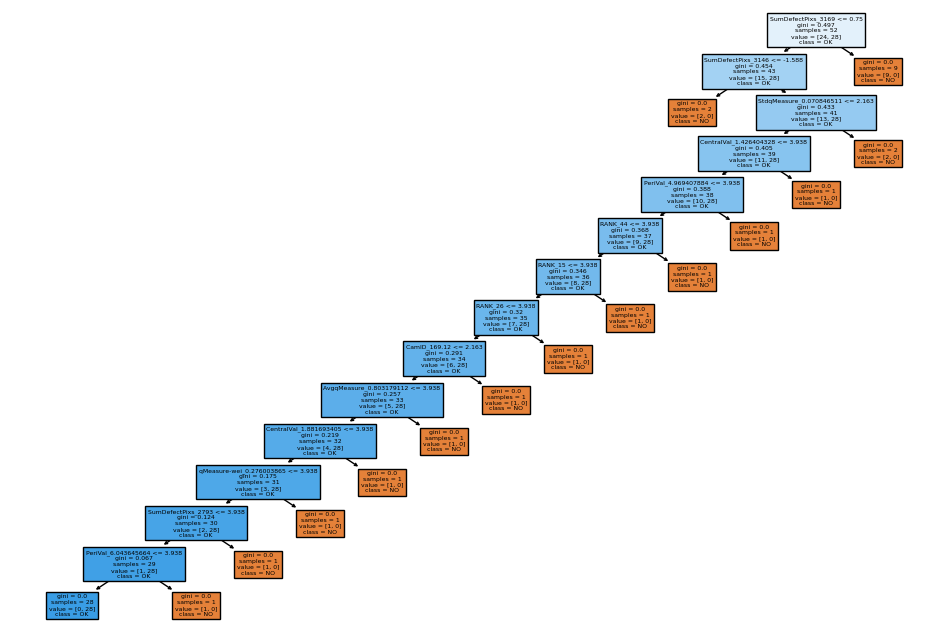

In [114]:
# Crear el modelo de árbol de decisión
modeltree = DecisionTreeClassifier()

# Entrenar el modelo
modeltree.fit(X_train2, y_train2)

# Realizar predicciones en los datos de prueba
y_pred2 = modeltree.predict(X_test2)

# Calcular la precisión del modelo
accuracytree = accuracy_score(y_test2, y_pred2)

# Guardamos el accuracy
accuracies.append(accuracytree)

# Imprimir la precisión del modelo arból de desición
print("Precisión del modelo de árbol de decisión:", accuracytree)

# Obtener los nombres de las características codificadas para plotear los datos
original_feature_names2 = X2.columns.tolist()
encoded_feature_names2 = encoder2.get_feature_names_out(input_features=original_feature_names2)
feature_names2 = original_feature_names2 + encoded_feature_names2.tolist()

# Plotear el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(modeltree, feature_names=feature_names2, class_names=modeltree.classes_, filled=True)
plt.show()


**Definimos los datos para realizar el modelo regresión logistica**




In [115]:
# Dividir los datos en características (X) y variable objetivo (y)
"""selected_fields1 = ['SumDefectPixs', 'MaxSizeReg', 'PassWeight','qMeasure-wei', 'WorstVal', 'AvgqMeasure', 'StdqMeasure',
                   'CentralVal', 'RANK', 'CLASS']
df_selected1 = df_rankingApr23_filtered[selected_fields1].copy()"""

X1 = df_rankingApr23_filtered.drop('CLASS', axis=1)
y1 = df_rankingApr23_filtered['CLASS']

# Realizar la codificación one-hot de la columna 'CLASS'
encoder1 = OneHotEncoder(sparse=False, drop='first')
X_encoded1 = encoder1.fit_transform(X1)

# Normalizamos los datos - StandardScaler
scaler1 = StandardScaler()

# Aplicar la estandarización a los datos
X_std1 = scaler1.fit_transform(X_encoded1)

# Sacamos conjunto de datos test y train
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_std1, y1, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Regresión logistica:**

In [116]:
# Crear el modelo de regresión logistica
modellg = LogisticRegression()
# Entrenar el modelo
modellg.fit(X_train1, y_train1)
# Realizar predicciones en los datos de prueba
y_pred1 = modellg.predict(X_test1)
# Calcular la precisión del modelo
accuracylg = accuracy_score(y_test1, y_pred1)
# Imprimir la precisión del modelo regresión logistica
print("Precisión de la regresión logistica:", accuracylg)
# Guardamos para luego ver los 3 modelos
accuracies.append(accuracylg)

Precisión de la regresión logistica: 0.7692307692307693


**Definimos los datos para el modelo XGBoost**

In [117]:
# Dividir los datos en características (X) y variable objetivo (y)
"""selected_fields3 = ['SumDefectPixs', 'MaxSizeReg', 'PassWeight','qMeasure-wei', 'WorstVal', 'AvgqMeasure', 'StdqMeasure',
                   'CentralVal', 'RANK', 'CLASS']
df_selected3 = df_rankingApr23_filtered[selected_fields3].copy()"""

X3 = df_rankingApr23_filtered.drop('CLASS', axis=1)
y3 = df_rankingApr23_filtered['CLASS']

# Realizar la codificación one-hot de la columna 'CLASS'
encoder3 = OneHotEncoder(sparse=False, drop='first')
X_encoded3 = encoder3.fit_transform(X3)

# Normalizamos los datos - StandardScaler
scaler3 = StandardScaler()

# Aplicar la estandarización a los datos
X_std3 = scaler3.fit_transform(X_encoded3)

# Sacamos conjunto de datos test y train
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_std3, y3, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Modelo XGBoost**

In [118]:
# Crear el objeto LabelEncoder
label_encoder3 = LabelEncoder()

# Convertir las etiquetas de texto a valores numéricos
y_train_encoded3 = label_encoder3.fit_transform(y_train3)
y_test_encoded3 = label_encoder3.transform(y_test3)

# Cargamos modelo XGBoost
modelxg = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)

# Entrenar el modelo
modelxg.fit(X_train3, y_train_encoded3)

# Realizar predicciones en los datos de prueba
y_predxg = modelxg.predict(X_test3)
#y_pred_decoded = label_encoder.inverse_transform(y_predxg)

# Calcular la precisión del modelo
accuracyxg = accuracy_score(y_test_encoded3, y_predxg)

#Guardamos el accuracy
accuracies.append(accuracyxg)

# Imprimir la precisión del modelo xgboost
print("Precisión del modelo de xgboost:", accuracyxg)


Precisión del modelo de xgboost: 0.8461538461538461


**Precisiones obtenidas**

In [119]:
# Imprimir los resultados
for i, accuracy in enumerate(accuracies):
    print(f"Accuracy del modelo {i+1}: {accuracy}")

Accuracy del modelo 1: 0.7692307692307693
Accuracy del modelo 2: 0.7692307692307693
Accuracy del modelo 3: 0.8461538461538461


**Matriz confusión**

Conclusión: el modelo llegaría a cuantificar 2 falsos positivos, podemos decir que el modelo es optimista.

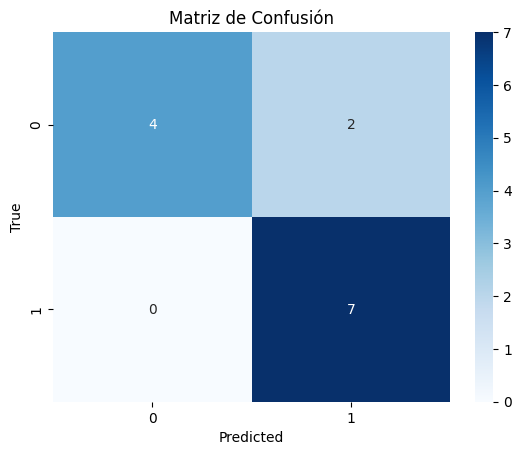

In [120]:
# Obtener la matriz de confusión
confusion_mtx = confusion_matrix(y_test_encoded3, y_predxg)

# Mostrar la matriz de confusión
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()


**ENTREGABLE 2**

En este entregable hemos leido los datos para analizarlos y saber porque campos podemos realizar el merge. Para ello, hemos creado un nuevo campo llamado datetime tanto en cada uno de los csv de las estaciones correspondientes como en el csv de weather. 

Posteriormente hemos realizado un merge y finalmente hemos eliminado los datos redundantes que en este caso son time, hour, date, hour ya que tenemos el campo nuevo datetime.

Finalmente hemos añadido el campo weekday que nos indica el dia de esa semana. 

**Cargamos estaciones de bicis y visualizamos para saber que tipos de datos tenemos**

In [121]:

#Definimos los ficheros
file_064 = '/content/drive/MyDrive/qesdatascience/station_064.csv'
file_274 = '/content/drive/MyDrive/qesdatascience/station_274.csv'
#Creamos dataframe
df_064 = pd.DataFrame()
df_274 = pd.DataFrame()
#Importamos los datos
data_064 = pd.read_csv(file_064)
data_274 = pd.read_csv(file_274)
#Generamos los dataframe
df_064 = pd.concat([df_064, data_064], axis=0)
df_274 = pd.concat([df_274, data_274], axis=0)
display("Station_064",df_064,"Station_274", df_274)



'Station_064'

,date,hour,total,available,free
0,01-11-2014,00:00:00,30,22,8
1,01-11-2014,00:10:00,30,25,5
2,01-11-2014,00:20:00,30,25,5
3,01-11-2014,00:30:00,30,22,8
4,01-11-2014,00:40:00,30,17,13
...,...,...,...,...,...
8779,31-12-2014,23:10:00,30,11,19
8780,31-12-2014,23:20:00,30,14,16
8781,31-12-2014,23:30:00,30,10,20
8782,31-12-2014,23:40:00,30,15,15


'Station_274'

,date,hour,total,available,free
0,01-11-2014,00:00:00,15,11,4
1,01-11-2014,00:10:00,15,15,0
2,01-11-2014,00:20:00,15,2,13
3,01-11-2014,00:30:00,15,6,9
4,01-11-2014,00:40:00,15,13,2
...,...,...,...,...,...
8779,31-12-2014,23:10:00,15,10,5
8780,31-12-2014,23:20:00,15,8,7
8781,31-12-2014,23:30:00,15,7,8
8782,31-12-2014,23:40:00,15,14,1


**Cargamos datos metereologicos**

In [122]:
#Definimos el fichero 
file_weather = '/content/drive/MyDrive/qesdatascience/VLC_weather_NOV14_DEC15.csv'
#Creamos dataframe
df_weather = pd.DataFrame()
#Importamos los datos
data_weather = pd.read_csv(file_weather)
#Generamos los dataframe
df_weather = pd.concat([df_weather,data_weather], axis=0)
display("VLC_weather",df_weather)


'VLC_weather'

,Date,Time,VelMax(m/s),Vel(m/s),Temp(C),HRel(HR),Pres(mb),Precip(l/m2)
0,01/11/2014,00:00:00,1.6,0.0,18.9,86,1023.8,0.0
1,01/11/2014,00:10:00,3.2,0.0,19,86,1023.7,0.0
2,01/11/2014,00:20:00,1.6,0.0,19,86,1023.7,0.0
3,01/11/2014,00:30:00,1.6,0.0,18.9,86,1023.7,0.0
4,01/11/2014,00:40:00,0.0,0.0,18.9,86,1023.8,0.0
...,...,...,...,...,...,...,...,...
8779,31/12/2014,23:10:00,1.6,0.0,10.6,73,997.4,0.0
8780,31/12/2014,23:20:00,1.6,0.0,10.3,74,997.4,0.0
8781,31/12/2014,23:30:00,1.6,0.0,10.2,75,997.7,0.0
8782,31/12/2014,23:40:00,1.6,0.0,10,75,997.5,0.0


**La forma que se nos ocurre para poder realizar un Merge de los datos de estaciones y tiempo es por fecha y hora**

In [123]:
    #Tratamos la fecha para poder realizar posteriormente un Merge
    df_064 = df_064.assign(datetime = pd.to_datetime(df_064['date'] + ' ' + df_064['hour']))
    df_274 = df_274.assign(datetime = pd.to_datetime(df_274['date'] + ' ' + df_274['hour']))
    df_weather['Date'] = pd.to_datetime(df_weather['Date'], format='%d/%m/%Y')
    df_weather['Date'] = df_weather['Date'].dt.strftime("%d-%m-%Y").astype(object)
    df_weather = df_weather.assign(datetime = pd.to_datetime(df_weather['Date'] + ' ' + df_weather['Time']))
    display('station_064',df_064,'station_274',df_274,'Weather',df_weather)

'station_064'

,date,hour,total,available,free,datetime
0,01-11-2014,00:00:00,30,22,8,2014-01-11 00:00:00
1,01-11-2014,00:10:00,30,25,5,2014-01-11 00:10:00
2,01-11-2014,00:20:00,30,25,5,2014-01-11 00:20:00
3,01-11-2014,00:30:00,30,22,8,2014-01-11 00:30:00
4,01-11-2014,00:40:00,30,17,13,2014-01-11 00:40:00
...,...,...,...,...,...,...
8779,31-12-2014,23:10:00,30,11,19,2014-12-31 23:10:00
8780,31-12-2014,23:20:00,30,14,16,2014-12-31 23:20:00
8781,31-12-2014,23:30:00,30,10,20,2014-12-31 23:30:00
8782,31-12-2014,23:40:00,30,15,15,2014-12-31 23:40:00


'station_274'

,date,hour,total,available,free,datetime
0,01-11-2014,00:00:00,15,11,4,2014-01-11 00:00:00
1,01-11-2014,00:10:00,15,15,0,2014-01-11 00:10:00
2,01-11-2014,00:20:00,15,2,13,2014-01-11 00:20:00
3,01-11-2014,00:30:00,15,6,9,2014-01-11 00:30:00
4,01-11-2014,00:40:00,15,13,2,2014-01-11 00:40:00
...,...,...,...,...,...,...
8779,31-12-2014,23:10:00,15,10,5,2014-12-31 23:10:00
8780,31-12-2014,23:20:00,15,8,7,2014-12-31 23:20:00
8781,31-12-2014,23:30:00,15,7,8,2014-12-31 23:30:00
8782,31-12-2014,23:40:00,15,14,1,2014-12-31 23:40:00


'Weather'

,Date,Time,VelMax(m/s),Vel(m/s),Temp(C),HRel(HR),Pres(mb),Precip(l/m2),datetime
0,01-11-2014,00:00:00,1.6,0.0,18.9,86,1023.8,0.0,2014-01-11 00:00:00
1,01-11-2014,00:10:00,3.2,0.0,19,86,1023.7,0.0,2014-01-11 00:10:00
2,01-11-2014,00:20:00,1.6,0.0,19,86,1023.7,0.0,2014-01-11 00:20:00
3,01-11-2014,00:30:00,1.6,0.0,18.9,86,1023.7,0.0,2014-01-11 00:30:00
4,01-11-2014,00:40:00,0.0,0.0,18.9,86,1023.8,0.0,2014-01-11 00:40:00
...,...,...,...,...,...,...,...,...,...
8779,31-12-2014,23:10:00,1.6,0.0,10.6,73,997.4,0.0,2014-12-31 23:10:00
8780,31-12-2014,23:20:00,1.6,0.0,10.3,74,997.4,0.0,2014-12-31 23:20:00
8781,31-12-2014,23:30:00,1.6,0.0,10.2,75,997.7,0.0,2014-12-31 23:30:00
8782,31-12-2014,23:40:00,1.6,0.0,10,75,997.5,0.0,2014-12-31 23:40:00


In [124]:
df_064_weather = pd.merge(df_064,df_weather,on=['datetime'])
df_274_weather = pd.merge(df_274,df_weather,on=['datetime'])
display('station_064',df_064_weather, 'station_274',df_274_weather)

'station_064'

,date,hour,total,available,free,datetime,Date,Time,VelMax(m/s),Vel(m/s),Temp(C),HRel(HR),Pres(mb),Precip(l/m2)
0,01-11-2014,00:00:00,30,22,8,2014-01-11 00:00:00,01-11-2014,00:00:00,1.6,0.0,18.9,86,1023.8,0.0
1,01-11-2014,00:10:00,30,25,5,2014-01-11 00:10:00,01-11-2014,00:10:00,3.2,0.0,19,86,1023.7,0.0
2,01-11-2014,00:20:00,30,25,5,2014-01-11 00:20:00,01-11-2014,00:20:00,1.6,0.0,19,86,1023.7,0.0
3,01-11-2014,00:30:00,30,22,8,2014-01-11 00:30:00,01-11-2014,00:30:00,1.6,0.0,18.9,86,1023.7,0.0
4,01-11-2014,00:40:00,30,17,13,2014-01-11 00:40:00,01-11-2014,00:40:00,0.0,0.0,18.9,86,1023.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,31-12-2014,23:10:00,30,11,19,2014-12-31 23:10:00,31-12-2014,23:10:00,1.6,0.0,10.6,73,997.4,0.0
8780,31-12-2014,23:20:00,30,14,16,2014-12-31 23:20:00,31-12-2014,23:20:00,1.6,0.0,10.3,74,997.4,0.0
8781,31-12-2014,23:30:00,30,10,20,2014-12-31 23:30:00,31-12-2014,23:30:00,1.6,0.0,10.2,75,997.7,0.0
8782,31-12-2014,23:40:00,30,15,15,2014-12-31 23:40:00,31-12-2014,23:40:00,1.6,0.0,10,75,997.5,0.0


'station_274'

,date,hour,total,available,free,datetime,Date,Time,VelMax(m/s),Vel(m/s),Temp(C),HRel(HR),Pres(mb),Precip(l/m2)
0,01-11-2014,00:00:00,15,11,4,2014-01-11 00:00:00,01-11-2014,00:00:00,1.6,0.0,18.9,86,1023.8,0.0
1,01-11-2014,00:10:00,15,15,0,2014-01-11 00:10:00,01-11-2014,00:10:00,3.2,0.0,19,86,1023.7,0.0
2,01-11-2014,00:20:00,15,2,13,2014-01-11 00:20:00,01-11-2014,00:20:00,1.6,0.0,19,86,1023.7,0.0
3,01-11-2014,00:30:00,15,6,9,2014-01-11 00:30:00,01-11-2014,00:30:00,1.6,0.0,18.9,86,1023.7,0.0
4,01-11-2014,00:40:00,15,13,2,2014-01-11 00:40:00,01-11-2014,00:40:00,0.0,0.0,18.9,86,1023.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,31-12-2014,23:10:00,15,10,5,2014-12-31 23:10:00,31-12-2014,23:10:00,1.6,0.0,10.6,73,997.4,0.0
8780,31-12-2014,23:20:00,15,8,7,2014-12-31 23:20:00,31-12-2014,23:20:00,1.6,0.0,10.3,74,997.4,0.0
8781,31-12-2014,23:30:00,15,7,8,2014-12-31 23:30:00,31-12-2014,23:30:00,1.6,0.0,10.2,75,997.7,0.0
8782,31-12-2014,23:40:00,15,14,1,2014-12-31 23:40:00,31-12-2014,23:40:00,1.6,0.0,10,75,997.5,0.0


**Siguiendo el enunciado, nos aconsejan sacar el diasemana (weekday)**

In [125]:
df_064_weather = df_064_weather.assign(weekday = df_064_weather['datetime'].dt.dayofweek)
df_274_weather = df_274_weather.assign(weekday = df_274_weather['datetime'].dt.dayofweek)
display('station_064',df_064_weather,'station_274',df_274_weather)

'station_064'

,date,hour,total,available,free,datetime,Date,Time,VelMax(m/s),Vel(m/s),Temp(C),HRel(HR),Pres(mb),Precip(l/m2),weekday
0,01-11-2014,00:00:00,30,22,8,2014-01-11 00:00:00,01-11-2014,00:00:00,1.6,0.0,18.9,86,1023.8,0.0,5
1,01-11-2014,00:10:00,30,25,5,2014-01-11 00:10:00,01-11-2014,00:10:00,3.2,0.0,19,86,1023.7,0.0,5
2,01-11-2014,00:20:00,30,25,5,2014-01-11 00:20:00,01-11-2014,00:20:00,1.6,0.0,19,86,1023.7,0.0,5
3,01-11-2014,00:30:00,30,22,8,2014-01-11 00:30:00,01-11-2014,00:30:00,1.6,0.0,18.9,86,1023.7,0.0,5
4,01-11-2014,00:40:00,30,17,13,2014-01-11 00:40:00,01-11-2014,00:40:00,0.0,0.0,18.9,86,1023.8,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,31-12-2014,23:10:00,30,11,19,2014-12-31 23:10:00,31-12-2014,23:10:00,1.6,0.0,10.6,73,997.4,0.0,2
8780,31-12-2014,23:20:00,30,14,16,2014-12-31 23:20:00,31-12-2014,23:20:00,1.6,0.0,10.3,74,997.4,0.0,2
8781,31-12-2014,23:30:00,30,10,20,2014-12-31 23:30:00,31-12-2014,23:30:00,1.6,0.0,10.2,75,997.7,0.0,2
8782,31-12-2014,23:40:00,30,15,15,2014-12-31 23:40:00,31-12-2014,23:40:00,1.6,0.0,10,75,997.5,0.0,2


'station_274'

,date,hour,total,available,free,datetime,Date,Time,VelMax(m/s),Vel(m/s),Temp(C),HRel(HR),Pres(mb),Precip(l/m2),weekday
0,01-11-2014,00:00:00,15,11,4,2014-01-11 00:00:00,01-11-2014,00:00:00,1.6,0.0,18.9,86,1023.8,0.0,5
1,01-11-2014,00:10:00,15,15,0,2014-01-11 00:10:00,01-11-2014,00:10:00,3.2,0.0,19,86,1023.7,0.0,5
2,01-11-2014,00:20:00,15,2,13,2014-01-11 00:20:00,01-11-2014,00:20:00,1.6,0.0,19,86,1023.7,0.0,5
3,01-11-2014,00:30:00,15,6,9,2014-01-11 00:30:00,01-11-2014,00:30:00,1.6,0.0,18.9,86,1023.7,0.0,5
4,01-11-2014,00:40:00,15,13,2,2014-01-11 00:40:00,01-11-2014,00:40:00,0.0,0.0,18.9,86,1023.8,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,31-12-2014,23:10:00,15,10,5,2014-12-31 23:10:00,31-12-2014,23:10:00,1.6,0.0,10.6,73,997.4,0.0,2
8780,31-12-2014,23:20:00,15,8,7,2014-12-31 23:20:00,31-12-2014,23:20:00,1.6,0.0,10.3,74,997.4,0.0,2
8781,31-12-2014,23:30:00,15,7,8,2014-12-31 23:30:00,31-12-2014,23:30:00,1.6,0.0,10.2,75,997.7,0.0,2
8782,31-12-2014,23:40:00,15,14,1,2014-12-31 23:40:00,31-12-2014,23:40:00,1.6,0.0,10,75,997.5,0.0,2


**Eliminamos atributos redundantes**

In [126]:
df_064_weather_c = df_064_weather.drop(['Date','Time','date','hour'],axis=1)
df_274_weather_c = df_274_weather.drop(['Date','Time','date','hour'],axis=1)
display('station_064',df_064_weather_c,'station_274',df_274_weather_c)

'station_064'

,total,available,free,datetime,VelMax(m/s),Vel(m/s),Temp(C),HRel(HR),Pres(mb),Precip(l/m2),weekday
0,30,22,8,2014-01-11 00:00:00,1.6,0.0,18.9,86,1023.8,0.0,5
1,30,25,5,2014-01-11 00:10:00,3.2,0.0,19,86,1023.7,0.0,5
2,30,25,5,2014-01-11 00:20:00,1.6,0.0,19,86,1023.7,0.0,5
3,30,22,8,2014-01-11 00:30:00,1.6,0.0,18.9,86,1023.7,0.0,5
4,30,17,13,2014-01-11 00:40:00,0.0,0.0,18.9,86,1023.8,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...
8779,30,11,19,2014-12-31 23:10:00,1.6,0.0,10.6,73,997.4,0.0,2
8780,30,14,16,2014-12-31 23:20:00,1.6,0.0,10.3,74,997.4,0.0,2
8781,30,10,20,2014-12-31 23:30:00,1.6,0.0,10.2,75,997.7,0.0,2
8782,30,15,15,2014-12-31 23:40:00,1.6,0.0,10,75,997.5,0.0,2


'station_274'

,total,available,free,datetime,VelMax(m/s),Vel(m/s),Temp(C),HRel(HR),Pres(mb),Precip(l/m2),weekday
0,15,11,4,2014-01-11 00:00:00,1.6,0.0,18.9,86,1023.8,0.0,5
1,15,15,0,2014-01-11 00:10:00,3.2,0.0,19,86,1023.7,0.0,5
2,15,2,13,2014-01-11 00:20:00,1.6,0.0,19,86,1023.7,0.0,5
3,15,6,9,2014-01-11 00:30:00,1.6,0.0,18.9,86,1023.7,0.0,5
4,15,13,2,2014-01-11 00:40:00,0.0,0.0,18.9,86,1023.8,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...
8779,15,10,5,2014-12-31 23:10:00,1.6,0.0,10.6,73,997.4,0.0,2
8780,15,8,7,2014-12-31 23:20:00,1.6,0.0,10.3,74,997.4,0.0,2
8781,15,7,8,2014-12-31 23:30:00,1.6,0.0,10.2,75,997.7,0.0,2
8782,15,14,1,2014-12-31 23:40:00,1.6,0.0,10,75,997.5,0.0,2
